In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [49]:
import scipy
import statsmodels
from scipy.stats import t
from scipy.stats import ttest_rel
from scipy.stats import ttest_ind
from scipy.stats import ttest_1samp

In [3]:
data= pd.read_csv('../data/raw/diamonds_train.csv')

In [4]:
data.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,1.21,Premium,J,VS2,62.4,58.0,4268,6.83,6.79,4.25
1,0.32,Very Good,H,VS2,63.0,57.0,505,4.35,4.38,2.75
2,0.71,Fair,G,VS1,65.5,55.0,2686,5.62,5.53,3.65
3,0.41,Good,D,SI1,63.8,56.0,738,4.68,4.72,3.00
4,1.02,Ideal,G,SI1,60.5,59.0,4882,6.55,6.51,3.95


## 1º GLOBAL ANALYSIS

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40455 entries, 0 to 40454
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    40455 non-null  float64
 1   cut      40455 non-null  object 
 2   color    40455 non-null  object 
 3   clarity  40455 non-null  object 
 4   depth    40455 non-null  float64
 5   table    40455 non-null  float64
 6   price    40455 non-null  int64  
 7   x        40455 non-null  float64
 8   y        40455 non-null  float64
 9   z        40455 non-null  float64
dtypes: float64(6), int64(1), object(3)
memory usage: 3.1+ MB


The different types in the data set are: float64(6), int64(1), object(3)

In [6]:
data.isnull().sum()

carat      0
cut        0
color      0
clarity    0
depth      0
table      0
price      0
x          0
y          0
z          0
dtype: int64

The are no null values in any column

In [7]:
data.describe()

,carat,depth,table,price,x,y,z
count,40455.000000,40455.000000,40455.000000,40455.000000,40455.000000,40455.000000,40455.000000
mean,0.797706,61.752841,57.446133,3928.444469,5.729392,5.732819,3.537154
std,0.475544,1.431725,2.233535,3992.416147,1.124453,1.146650,0.697062
min,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,0.400000,61.000000,56.000000,945.000000,4.710000,4.720000,2.910000
50%,0.700000,61.800000,57.000000,2397.000000,5.690000,5.710000,3.520000
75%,1.040000,62.500000,59.000000,5331.000000,6.540000,6.540000,4.035000
max,4.500000,79.000000,95.000000,18823.000000,10.230000,58.900000,8.060000


The standard deviation of all columns remains at very low values, except in the case of the price, where we find a very high deviation, due to the very wide range of prices.
We can see that the minimum values for x, y and z are 0, so there are invalid values for the analysis.

In [8]:
x=data['x'][(data['x']==0)].count()
y=data['y'][(data['y']==0)].count()
z=data['z'][(data['z']==0)].count()

print(f'The quantity of values zero in x: {x} in y: {y} and in z: {z}')

The quantity of values zero in x: 5 in y: 4 and in z: 16


In [9]:
data[['x','y','z']] = data[['x','y','z']].replace(0,np.NaN)
data.dropna(inplace=True)
data.isnull().sum()

carat      0
cut        0
color      0
clarity    0
depth      0
table      0
price      0
x          0
y          0
z          0
dtype: int64

We have already delete the rows with null values in x, y and z.

In [10]:
data.describe()

,carat,depth,table,price,x,y,z
count,40439.000000,40439.000000,40439.000000,40439.000000,40439.000000,40439.000000,40439.000000
mean,0.797425,61.753013,57.445543,3926.535448,5.729616,5.732897,3.538553
std,0.475257,1.431306,2.233055,3990.024501,1.122384,1.145002,0.693639
min,0.200000,43.000000,43.000000,326.000000,3.770000,3.720000,1.070000
25%,0.400000,61.000000,56.000000,945.000000,4.710000,4.720000,2.910000
50%,0.700000,61.800000,57.000000,2396.000000,5.690000,5.710000,3.520000
75%,1.040000,62.500000,59.000000,5329.500000,6.540000,6.540000,4.040000
max,4.500000,79.000000,95.000000,18823.000000,10.230000,58.900000,8.060000


Now we can see that we have lost some rows in the data set
Other interesting thing is that the values of x and y are very similar, so the length and width are usually very similar

## 2º ANALISIS PER COLUMNS

### CARAT

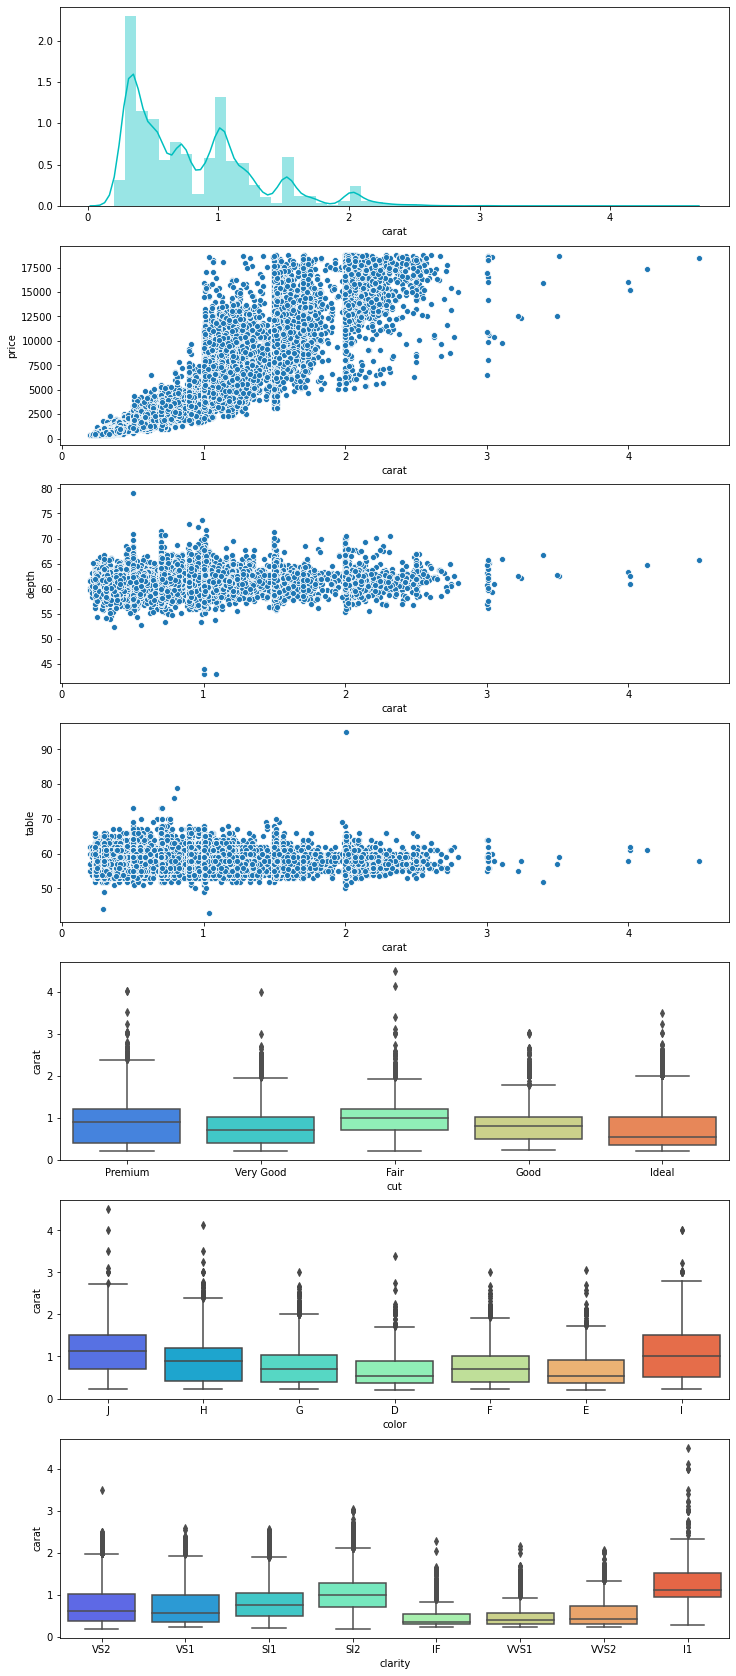

In [11]:
f, ax = plt.subplots(7,figsize=(12,30))
sns.distplot(data.carat,color='c',ax=ax[0])
sns.scatterplot(x='carat',y='price',data=data, palette='rainbow',ax=ax[1])
sns.scatterplot(x='carat',y='depth',data=data, palette='rainbow',ax=ax[2])
sns.scatterplot(x='carat',y='table',data=data, palette='rainbow',ax=ax[3])
sns.boxplot(x='cut',y='carat',data=data, palette='rainbow',ax=ax[4])
sns.boxplot(x='color',y='carat',data=data, palette='rainbow',ax=ax[5])
sns.boxplot(x='clarity',y='carat',data=data, palette='rainbow',ax=ax[6])
#sns.boxplot(x='cut',y='price',data=data, palette='rainbow')

- Most diamonds are in the 0.2 and 1.2 carat range
- Price and carat are highly correlated
- Depth and table values are in very similar ranges. This is further reinforced by observing the standard deviations of both
- No relevant data on cross carat and color
- The average number of carat per colour, is similar for all diamonds, except for the lower quality ones (I and J), where the values increase
- Also, looking at the quality of the diamonds, we find that the worst quality ones have more carat

### CUT

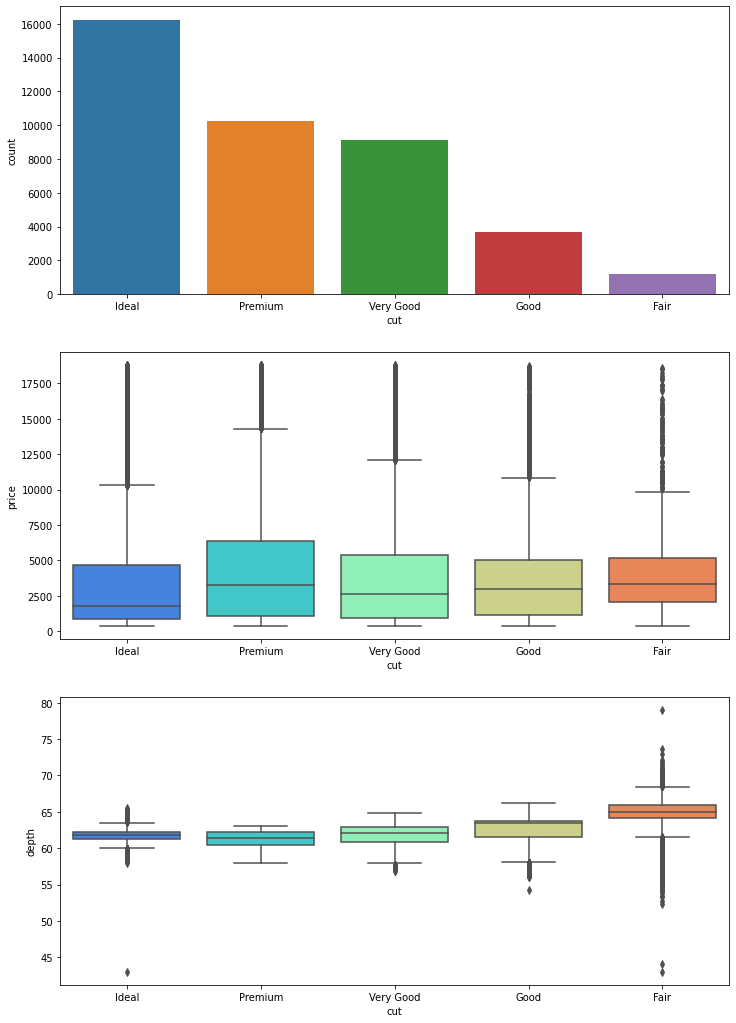

In [12]:
f, ax = plt.subplots(3, figsize=(12,18))
sns.countplot('cut', data=data,order=['Ideal','Premium','Very Good','Good','Fair'], ax=ax[0])
sns.boxplot(x='cut', y='price', data=data, palette='rainbow', order=['Ideal','Premium','Very Good','Good','Fair'], ax=ax[1])
sns.boxplot(x='cut', y='depth', data=data, palette='rainbow',order=['Ideal','Premium','Very Good','Good','Fair'],ax=ax[2])


- According to the cut classification, we can see that most of the diamonds in the dataset are concentrated among the highest quality.
- The diamonds with higher Depth are the Fair ones, the worst quality ones. 



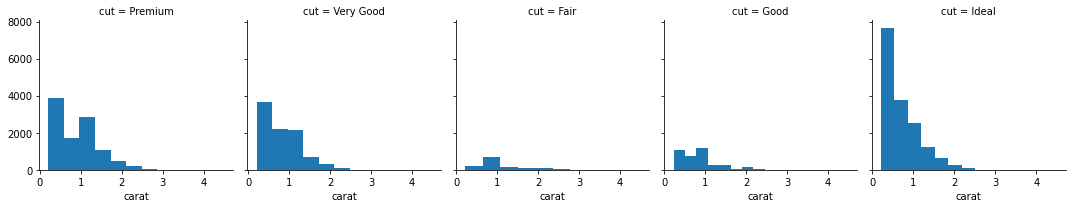

In [13]:
g = sns.FacetGrid(data=data,col='cut')
g.map(plt.hist,'carat')

As we observed before, most diamonds are in the range of 0.2-1.2 carat. But with this zoom by Cut, we can see that most Cut Ideal diamonds (the top ones), are <1 Carat.

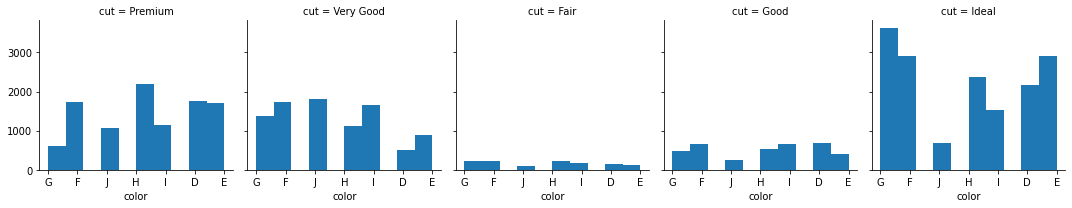

In [14]:
g = sns.FacetGrid(data=data,col='cut')
g.map(plt.hist,'color')

Crossing in Cut and Color, we see that the distribution is very similar in all the cases, although it is possible to emphasize that Very Good Cut, concentrates a greater proportion of diamonds of worse quality.

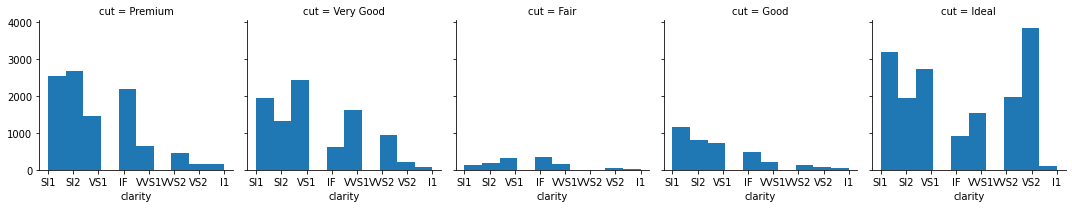

In [15]:
g = sns.FacetGrid(data=data,col='cut')
g.map(plt.hist,'clarity')

According to the Cut and Clarity, most diamonds are in intermediate qualities. VS and SI and we have almost no diamonds considered imperfect (I).

### COLOR

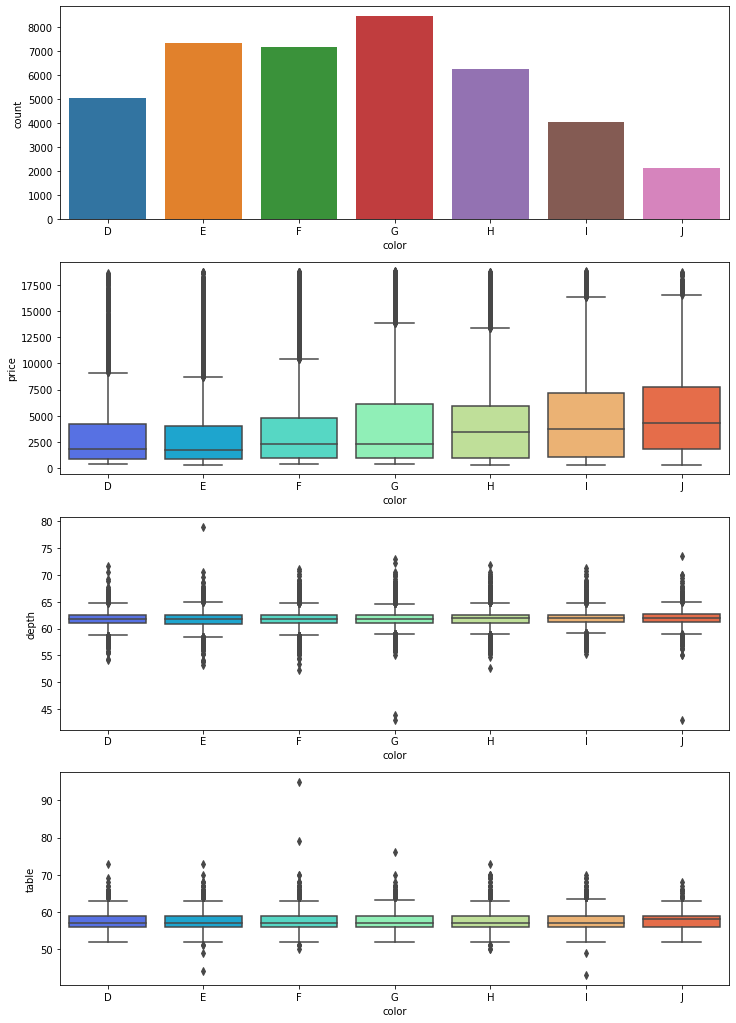

In [16]:
f, ax = plt.subplots(4, figsize=(12,18))
sns.countplot('color', data=data, order=['D','E','F','G','H','I','J'], ax=ax[0])
sns.boxplot(x='color',y='price',data=data, palette='rainbow', order=['D','E','F','G','H','I','J'] ,ax=ax[1])
sns.boxplot(x='color', y='depth', data=data, palette='rainbow',order=['D','E','F','G','H','I','J'],ax=ax[2])
sns.boxplot(x='color', y='table', data=data, palette='rainbow', order=['D','E','F','G','H','I','J'],ax=ax[3])


Analyzing the Color we observe that the data set has less diamonds of type D and I, J, which correspond to the best and worst Color of the data set.
The median price according to the color increases as the quality decreases. This may seem contradictory, but it is because the volume of worse colored diamonds has a higher carat.



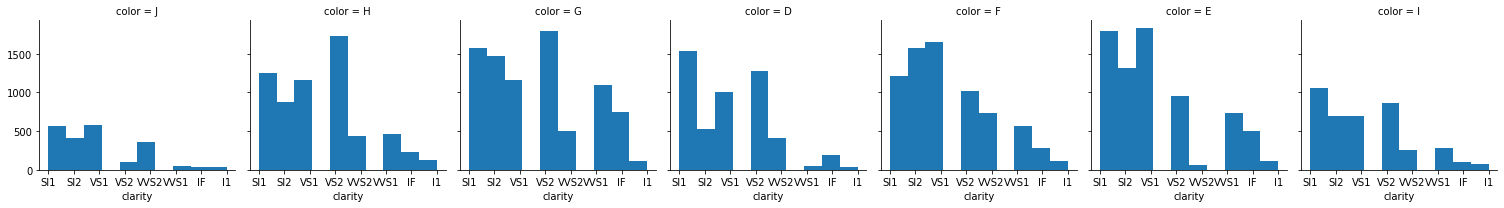

In [17]:
g = sns.FacetGrid(data=data,col='color')
g.map(plt.hist,'clarity')

We observe that there is a greater concentration of SI type diamonds in all the varieties of Color and also that those of color G and H are those that contain more VS.

## CLARITY

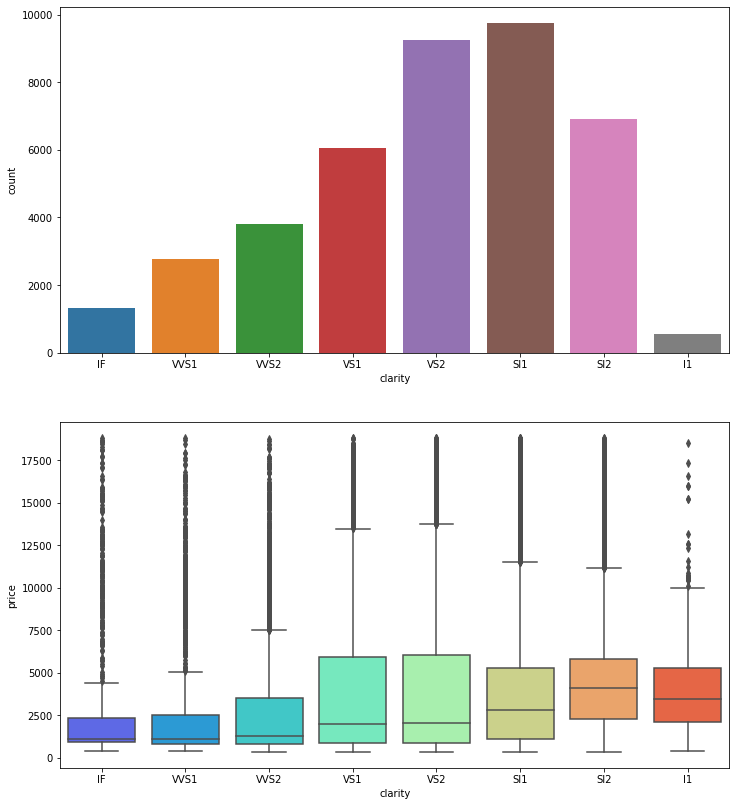

In [18]:
f, ax = plt.subplots(2, figsize=(12,14))
sns.countplot('clarity', data=data, order = ['IF','VVS1','VVS2','VS1','VS2','SI1','SI2','I1'],ax=ax[0])
sns.boxplot(x='clarity',y='price',data=data, palette='rainbow',order = ['IF','VVS1','VVS2','VS1','VS2','SI1','SI2','I1'], ax=ax[1])

We observe that there is a greater concentration of SI type diamonds in all the varieties of Color and also that those of color G and H are those that contain more VS.
The median price increases as the quality of Clarity decreases, again this is a fact that may seem contradictory, but it is due to the fact that there are diamonds with more carats in the lower quality bands.

### PRICE

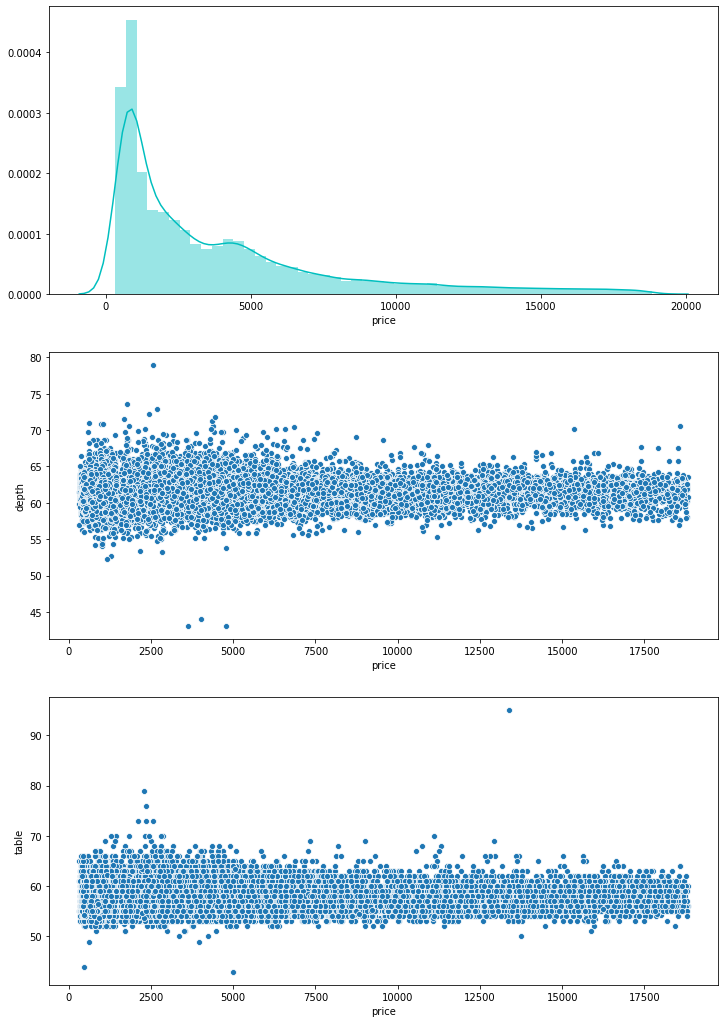

In [19]:
f, ax = plt.subplots(3, figsize=(12,18))
sns.distplot(data.price,color='c',ax=ax[0])
sns.scatterplot(x='price',y='depth',data=data, palette='rainbow',ax=ax[1])
sns.scatterplot(x='price',y='table',data=data, palette='rainbow',ax=ax[2])

### CORRELATIONS

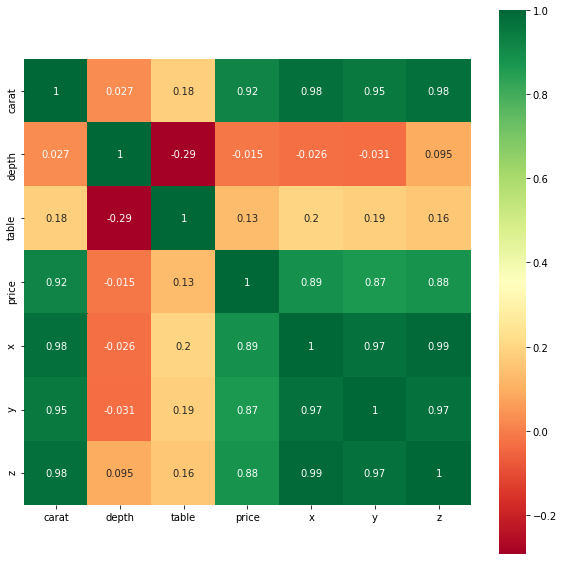

In [20]:
plt.figure(figsize=(10,10)) 
p=sns.heatmap(data.corr(), annot=True,cmap='RdYlGn',square=True) 

Analyzing the correlation of the different columns, we can see that the carat is very much related to the size variables (x,y and z) and those of the price. However, this is not the case with the depth and table variables.
Depth has correlation fundamentally with the z variable.
Table is a variable with low correlation with respect to the rest of the columns.
Price as we have already mentioned, is highly correlated with carats and x,y and z dimensions.


In [21]:
data['color'].unique()

array(['J', 'H', 'G', 'D', 'F', 'E', 'I'], dtype=object)

In [22]:
color_group = {"D": "Colorless",
                       "E": "Colorless",
                       "F": "Colorless",
                       "G": "Near Colorless",
                       "H": "Near Colorless",
                       "I": "Slighty Tinted",
                       "J": "Slighty Tinted"}
data['color group']=data['color'].map(color_group)

data.head()

,carat,cut,color,clarity,depth,table,price,x,y,z,color group
0,1.21,Premium,J,VS2,62.4,58.0,4268,6.83,6.79,4.25,Slighty Tinted
1,0.32,Very Good,H,VS2,63.0,57.0,505,4.35,4.38,2.75,Near Colorless
2,0.71,Fair,G,VS1,65.5,55.0,2686,5.62,5.53,3.65,Near Colorless
3,0.41,Good,D,SI1,63.8,56.0,738,4.68,4.72,3.00,Colorless
4,1.02,Ideal,G,SI1,60.5,59.0,4882,6.55,6.51,3.95,Near Colorless


In [23]:
data['clarity'].unique()

array(['VS2', 'VS1', 'SI1', 'SI2', 'IF', 'VVS1', 'VVS2', 'I1'],
      dtype=object)

In [24]:
clarity_group = {"IF": "IF",
                       "VVS1": "VVS",
                       "VVS2": "VVS",
                       "VS1": "VS",
                       "VS2": "VS",
                       "SI1": "SI",
                       "SI2": "SI",
                       "I1": "I"}
data['clarity group']=data['clarity'].map(clarity_group)

In [25]:
custom_data_diamond=data

custom_data_diamond.to_csv (r'../data/processed/custom_data_diamond.csv', index = False, header=True)

## T Test One sample

### Test 1 - one sample vs constant hypothesis test. 

In [26]:
test_results = ttest_1samp(custom_data_diamond['price'], 4000)
display(test_results.statistic)
display(test_results.pvalue < 0.05)

print(test_results.pvalue) # scipy is p_value of both sides

p_value_good = test_results.pvalue /2

print(p_value_good)

-3.702563138767485

True

0.00021371568757327803
0.00010685784378663901


In [30]:
mu = 4000
mu_hat = custom_data_diamond['price'].mean()
n = custom_data_diamond.shape[0]
std_hat = custom_data_diamond['price'].std()

t_test = (mu_hat - mu) / (std_hat / np.sqrt(n))
t_test


-3.702563138767485

In [33]:
rv = t(df=n-1)
p_value = rv.cdf(t_test)

print(p_value * 2)

0.00021371568757327803


### Test 2 - two independent samples. 

In [56]:
sub_test_1 = data[(data['cut'] == 'Good') & (data['color'] == 'E')]['price']
sub_test_2 = data[(data['cut'] == 'Good') & (data['color'] == 'F')]['price']

display(sub_test_1.mean())
display(sub_test_1.std())
display(sub_test_2.mean())
display(sub_test_2.std())
#diff_sub_test = sub_test_1-sub_test_2

test = ttest_ind(sub_test_1, sub_test_2, equal_var=False).pvalue

display(test)

print('The null hypothesis is not rejected, there is no significant statistical difference')


3399.88115942029

3318.2532966703548

3481.5755287009065

3168.049561925012

0.6433618593904988

The null hypothesis is not rejected, there is no significant statistical difference
